<a href="https://colab.research.google.com/github/Plashka320/Stat_prack_HW_VyuzhaninPD_2025/blob/main/1kyrsovaya_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/drive/1_aH_eI8VhcMtC2gckhdf4ePWYmgpAVSd?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Без словаря**

Распределение классифицированных типов:
predicted_type
4    290
3    134
2     61
5     58
1     57
Name: count, dtype: int64

Метрики классификации:
Точность (Accuracy): 0.7583333333333333
Precision (по типам): [0.71929825 0.52459016 0.73134328 0.80344828 0.87931034]
Recall (по типам): [0.6119403  0.35955056 0.70503597 0.95102041 0.85      ]
F1-score (по типам): [0.66129032 0.42666667 0.71794872 0.87102804 0.86440678]

Отчет классификации:
              precision    recall  f1-score   support

           1       0.72      0.61      0.66        67
           2       0.52      0.36      0.43        89
           3       0.73      0.71      0.72       139
           4       0.80      0.95      0.87       245
           5       0.88      0.85      0.86        60

    accuracy                           0.76       600
   macro avg       0.73      0.70      0.71       600
weighted avg       0.74      0.76      0.75       600



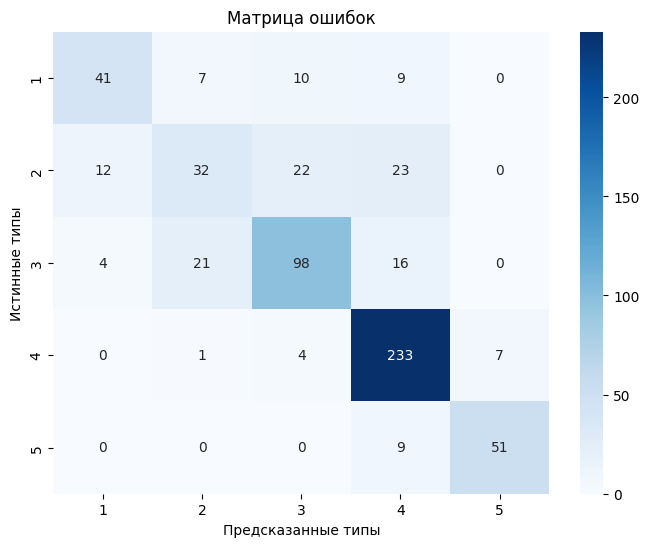

In [6]:
import pandas as pd
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
import matplotlib.pyplot as plt
import seaborn as sns

def is_approaching(bounds, drive, thoroughness, opportunity, carelessness, avoidance, inaction):
    """Проверка, является ли случай типом приближения"""
    if type(bounds) is not list:
        bounds = [bounds] * 6
    if (carelessness < bounds[3]) & (avoidance < bounds[4]) & (inaction < bounds[5]):
        if int(drive >= bounds[0]) + int(opportunity >= bounds[2]) + int(thoroughness >= bounds[1]) > 0:
            return True
    return False

def is_avoiding(bounds, drive, thoroughness, opportunity, carelessness, avoidance, inaction):
    """Проверка, является ли случай типом ухода"""
    if type(bounds) is not list:
        bounds = [bounds] * 6
    if (drive < bounds[0]) & (opportunity < bounds[2]) & (thoroughness < bounds[1]):
        if int(carelessness >= bounds[3]) + int(avoidance >= bounds[4]) + int(inaction >= bounds[5]) > 0:
            return True
    return False

def is_ambivalent(bounds, drive, thoroughness, opportunity, carelessness, avoidance, inaction):
    """Проверка, является ли случай амбивалентным типом"""
    if type(bounds) is not list:
        bounds = [bounds] * 6
    if int(carelessness >= bounds[3]) + int(avoidance >= bounds[4]) + int(inaction >= bounds[5]) > 0:
        if int(drive >= bounds[0]) + int(opportunity >= bounds[2]) + int(thoroughness >= bounds[1]) > 0:
            return True
    return False

def classify_tors_type(row, bounds=None):
    """Классифицирует случай на основе профиля ТОРС согласно алгоритму"""
    if bounds is None:
        # Пороги по умолчанию согласно уточнению к правилу 1:
        # drive, thoroughness, opportunity, carelessness, avoidance, inaction
        bounds = [1.5, 1.65, 1.5, 1.85, 1.5, 1.5]

    drive = row['drive']
    thoroughness = row['thoroughness']
    opportunity = row['opportunity']
    carelessness = row['carelessness']
    avoidance = row['avoidance']
    inaction = row['inaction']

    # Правило 1: Определение основной категории (приближение, амбивалентное, уход)
    approaching = is_approaching(bounds, drive, thoroughness, opportunity, carelessness, avoidance, inaction)
    avoiding = is_avoiding(bounds, drive, thoroughness, opportunity, carelessness, avoidance, inaction)
    ambivalent = is_ambivalent(bounds, drive, thoroughness, opportunity, carelessness, avoidance, inaction)

    # Сначала проверяем амбивалентные случаи (тип 4)
    if ambivalent:
        return 4

    # Затем проверяем чистые случаи приближения (типы 1, 2, 3)
    elif approaching and not avoiding:
        # Правило 2: Разделение типов приближения (1, 2 vs 3)
        if ('Ф6' not in row) or (row['Ф6'] == 0):
            # Находим максимальное значение среди шкал приближения
            max_approach_value = max(drive, thoroughness, opportunity)

            # Проверяем, является ли максимальное значение значением drive или thoroughness
            if max_approach_value == drive or max_approach_value == thoroughness:
                # Выбираем между типом 1 и типом 2
                return 1 if drive >= thoroughness else 2

        # Если условия не выполняются, возвращаем тип 3
        return 3

    # Затем проверяем чистые случаи ухода (тип 5)
    elif avoiding and not approaching:
        return 5

    # Все остальные случаи считаем неклассифицируемыми
    else:
        return None

def evaluate_classification(y_true, y_pred):
    """Вычисляет метрики классификации"""
    print("\nМетрики классификации:")
    print("Точность (Accuracy):", accuracy_score(y_true, y_pred))
    print("Precision (по типам):", precision_score(y_true, y_pred, average=None, labels=[1, 2, 3, 4, 5]))
    print("Recall (по типам):", recall_score(y_true, y_pred, average=None, labels=[1, 2, 3, 4, 5]))
    print("F1-score (по типам):", f1_score(y_true, y_pred, average=None, labels=[1, 2, 3, 4, 5]))

    print("\nОтчет классификации:")
    print(classification_report(y_true, y_pred, labels=[1, 2, 3, 4, 5], zero_division=0))

    # Матрица ошибок
    cm = confusion_matrix(y_true, y_pred, labels=[1, 2, 3, 4, 5])
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=[1, 2, 3, 4, 5],
                yticklabels=[1, 2, 3, 4, 5])
    plt.title('Матрица ошибок')
    plt.xlabel('Предсказанные типы')
    plt.ylabel('Истинные типы')
    plt.show()

# Загрузка данных
df = pd.read_excel('TORS_OLD.xlsx', sheet_name='Sheet1')

# Применение классификатора
df['predicted_type'] = df.apply(classify_tors_type, axis=1)

# Вывод распределения типов
print("Распределение классифицированных типов:")
print(df['predicted_type'].value_counts(dropna=False))

# Оценка качества классификации (если есть истинные значения)
if 'code' in df.columns:
    # Удаляем строки, где нет предсказания
    valid_idx = df['predicted_type'].notna()
    y_true = df.loc[valid_idx, 'code']
    y_pred = df.loc[valid_idx, 'predicted_type']

    # Преобразуем в int для метрик
    y_true = y_true.astype(int)
    y_pred = y_pred.astype(int)

    evaluate_classification(y_true, y_pred)
else:
    print("\nКолонка 'code' с истинными значениями не найдена. Оценка точности невозможна.")

**Со словарем**

Распределение классифицированных типов:
predicted_type
4    290
3    134
2     71
5     58
1     47
Name: count, dtype: int64

Метрики классификации:
Точность (Accuracy): 0.75
Precision (по типам): [0.63829787 0.53521127 0.73134328 0.80344828 0.87931034]
Recall (по типам): [0.44776119 0.42696629 0.70503597 0.95102041 0.85      ]
F1-score (по типам): [0.52631579 0.475      0.71794872 0.87102804 0.86440678]

Отчет классификации:
              precision    recall  f1-score   support

           1       0.64      0.45      0.53        67
           2       0.54      0.43      0.47        89
           3       0.73      0.71      0.72       139
           4       0.80      0.95      0.87       245
           5       0.88      0.85      0.86        60

    accuracy                           0.75       600
   macro avg       0.72      0.68      0.69       600
weighted avg       0.74      0.75      0.74       600



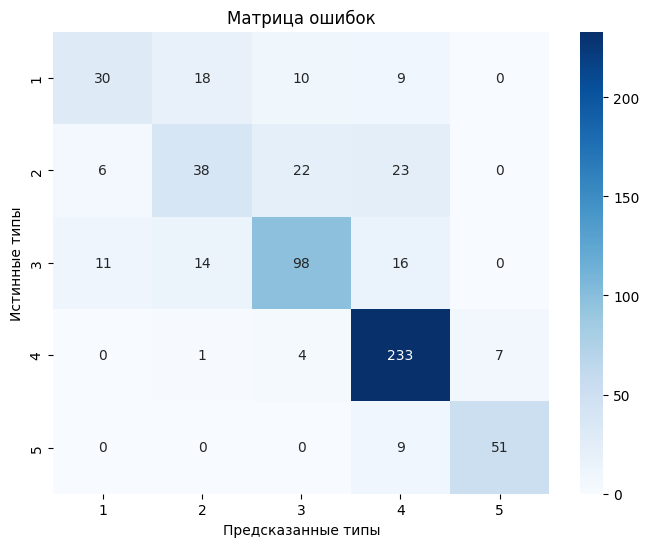

In [7]:
# Словари с весами для типов 1 и 2
dictionary_1 = {
    "Е3": 3,
    "Е4": 3,
    "А1": 3,
    "А2": 3,
    "1А2": 3,
    "1А5": 1,
    "1К1": 2,
    "1В4": 3,
    "В7": 3,
    "1D6": 2,
    "2A5": 3,
    "3A2": 2,
    "3A8": 3,
    "3B2": 2,
    "5A3": 2,
    "6B5": 1
}

dictionary_2 = {
    "Е2": 1,
    "Е6": 1,
    "Б1": 2,
    "Б4": 1,
    "Ф4.6": 3,
    "С4": 3,
    "С5": 3,
    "С6": 1,
    "1В9": 3,
    "1D5": 1,
    "1D8": 1,
    "2A4": 1,
    "3B4": 1,
    "3B5": 2,
    "5B4": 1,
    "6B8": 1
}


def calculate_weighted_sum(row, dictionary):
    """
    Подсчитывает взвешенную сумму значений признаков из строки DataFrame на основе словаря.
    :param row: Строка DataFrame с числовыми признаками.
    :param dictionary: Словарь с ключами (названиями признаков) и их весами.
    :return: Взвешенная сумма.
    """
    weighted_sum = 0
    for feature, weight in dictionary.items():
        if feature in row:
            weighted_sum += row[feature] * weight
    return weighted_sum


def is_approaching(bounds, drive, thoroughness, opportunity, carelessness, avoidance, inaction):
    """Проверка, является ли случай типом приближения"""
    if type(bounds) is not list:
        bounds = [bounds] * 6
    if (carelessness < bounds[3]) & (avoidance < bounds[4]) & (inaction < bounds[5]):
        if int(drive >= bounds[0]) + int(opportunity >= bounds[2]) + int(thoroughness >= bounds[1]) > 0:
            return True
    return False


def is_avoiding(bounds, drive, thoroughness, opportunity, carelessness, avoidance, inaction):
    """Проверка, является ли случай типом ухода"""
    if type(bounds) is not list:
        bounds = [bounds] * 6
    if (drive < bounds[0]) & (opportunity < bounds[2]) & (thoroughness < bounds[1]):
        if int(carelessness >= bounds[3]) + int(avoidance >= bounds[4]) + int(inaction >= bounds[5]) > 0:
            return True
    return False


def is_ambivalent(bounds, drive, thoroughness, opportunity, carelessness, avoidance, inaction):
    """Проверка, является ли случай амбивалентным типом"""
    if type(bounds) is not list:
        bounds = [bounds] * 6
    if int(carelessness >= bounds[3]) + int(avoidance >= bounds[4]) + int(inaction >= bounds[5]) > 0:
        if int(drive >= bounds[0]) + int(opportunity >= bounds[2]) + int(thoroughness >= bounds[1]) > 0:
            return True
    return False


def classify_tors_type(row, bounds=None):
    """Классифицирует случай на основе профиля ТОРС согласно алгоритму."""
    if bounds is None:
        # Пороги по умолчанию согласно уточнению к правилу 1:
        # drive, thoroughness, opportunity, carelessness, avoidance, inaction
        bounds = [1.5, 1.65, 1.5, 1.85, 1.5, 1.5]

    drive = row['drive']
    thoroughness = row['thoroughness']
    opportunity = row['opportunity']
    carelessness = row['carelessness']
    avoidance = row['avoidance']
    inaction = row['inaction']

    # Правило 1: Определение основной категории (приближение, амбивалентное, уход)
    approaching = is_approaching(bounds, drive, thoroughness, opportunity, carelessness, avoidance, inaction)
    avoiding = is_avoiding(bounds, drive, thoroughness, opportunity, carelessness, avoidance, inaction)
    ambivalent = is_ambivalent(bounds, drive, thoroughness, opportunity, carelessness, avoidance, inaction)

    # Правило 1: Амбивалентные случаи (тип 4)
    if ambivalent:
        return 4

    # Правило 2: Чистые случаи приближения (типы 1, 2, 3)
    elif approaching and not avoiding:
        # Вычисляем взвешенные суммы
        sum_dict_1 = calculate_weighted_sum(row, dictionary_1)
        sum_dict_2 = calculate_weighted_sum(row, dictionary_2)

        # Если взвешенная сумма словаря 1 больше, то тип 1, иначе тип 2
        if ('Ф6' not in row) or (row['Ф6'] == 0):
            max_approach_value = max(drive, thoroughness, opportunity)
            if max_approach_value == drive or max_approach_value == thoroughness:
                return 1 if sum_dict_1 >= sum_dict_2 else 2

        # Если условия не выполняются, возвращаем тип 3
        return 3

    # Правило 4: Чистые случаи ухода (тип 5)
    elif avoiding and not approaching:
        return 5

    # Все остальные случаи считаются неклассифицируемыми
    else:
        return None


# Загрузка данных
df = pd.read_excel('TORS_OLD.xlsx', sheet_name='Sheet1')

# Применение классификатора
df['predicted_type'] = df.apply(classify_tors_type, axis=1)

# Вывод распределения типов
print("Распределение классифицированных типов:")
print(df['predicted_type'].value_counts(dropna=False))

# Оценка качества классификации (если есть истинные значения)
if 'code' in df.columns:
    # Удаляем строки, где нет предсказания
    valid_idx = df['predicted_type'].notna()
    y_true = df.loc[valid_idx, 'code']
    y_pred = df.loc[valid_idx, 'predicted_type']

    # Преобразуем в int для метрик
    y_true = y_true.astype(int)
    y_pred = y_pred.astype(int)

    evaluate_classification(y_true, y_pred)
else:
    print("\nКолонка 'code' с истинными значениями не найдена. Оценка точности невозможна.")

Перебор порогов со словарем

In [4]:
import pandas as pd
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
import matplotlib.pyplot as plt
import seaborn as sns


# Словари с весами для типов 1 и 2
dictionary_1 = {
    "Е3": 3,
    "Е4": 3,
    "А1": 3,
    "А2": 3,
    "1А2": 3,
    "1А5": 1,
    "1К1": 2,
    "1В4": 3,
    "В7": 3,
    "1D6": 2,
    "2A5": 3,
    "3A2": 2,
    "3A8": 3,
    "3B2": 2,
    "5A3": 2,
    "6B5": 1
}

dictionary_2 = {
    "Е2": 1,
    "Е6": 1,
    "Б1": 2,
    "Б4": 1,
    "Ф4.6": 3,
    "С4": 3,
    "С5": 3,
    "С6": 1,
    "1В9": 3,
    "1D5": 1,
    "1D8": 1,
    "2A4": 1,
    "3B4": 1,
    "3B5": 2,
    "5B4": 1,
    "6B8": 1
}


def calculate_weighted_sum(row, dictionary):
    """
    Подсчитывает взвешенную сумму значений признаков из строки DataFrame на основе словаря.
    :param row: Строка DataFrame с числовыми признаками.
    :param dictionary: Словарь с ключами (названиями признаков) и их весами.
    :return: Взвешенная сумма.
    """
    weighted_sum = 0
    for feature, weight in dictionary.items():
        if feature in row:
            weighted_sum += row[feature] * weight
    return weighted_sum


def is_approaching(bounds, drive, thoroughness, opportunity, carelessness, avoidance, inaction):
    """Проверка, является ли случай типом приближения"""
    if type(bounds) is not list:
        bounds = [bounds] * 6
    if (carelessness < bounds[3]) & (avoidance < bounds[4]) & (inaction < bounds[5]):
        if int(drive >= bounds[0]) + int(opportunity >= bounds[2]) + int(thoroughness >= bounds[1]) > 0:
            return True
    return False


def is_avoiding(bounds, drive, thoroughness, opportunity, carelessness, avoidance, inaction):
    """Проверка, является ли случай типом ухода"""
    if type(bounds) is not list:
        bounds = [bounds] * 6
    if (drive < bounds[0]) & (opportunity < bounds[2]) & (thoroughness < bounds[1]):
        if int(carelessness >= bounds[3]) + int(avoidance >= bounds[4]) + int(inaction >= bounds[5]) > 0:
            return True
    return False


def is_ambivalent(bounds, drive, thoroughness, opportunity, carelessness, avoidance, inaction):
    """Проверка, является ли случай амбивалентным типом"""
    if type(bounds) is not list:
        bounds = [bounds] * 6
    if int(carelessness >= bounds[3]) + int(avoidance >= bounds[4]) + int(inaction >= bounds[5]) > 0:
        if int(drive >= bounds[0]) + int(opportunity >= bounds[2]) + int(thoroughness >= bounds[1]) > 0:
            return True
    return False


import numpy as np

def find_best_bounds(df, target_column='code'):
    """
    Находит оптимальные пороги для шкал ТОРС путем перебора всех возможных комбинаций.
    :param df: DataFrame с данными.
    :param target_column: Имя столбца с истинными метками классов.
    :return: Оптимальные пороги и соответствующую точность.
    """
    best_accuracy = 0
    best_bounds = None

    # Генерация всех возможных комбинаций порогов
    thresholds = np.arange(1.0, 2.1, 0.2)
    for drive_bound in thresholds:
        for thoroughness_bound in thresholds:
            for opportunity_bound in thresholds:
                for carelessness_bound in thresholds:
                    for avoidance_bound in thresholds:
                        for inaction_bound in thresholds:
                            bounds = [
                                drive_bound,
                                thoroughness_bound,
                                opportunity_bound,
                                carelessness_bound,
                                avoidance_bound,
                                inaction_bound
                            ]

                            # Применение классификатора с текущими порогами
                            df['predicted_type'] = df.apply(lambda row: classify_tors_type(row, bounds), axis=1)

                            # Фильтрация строк с неклассифицируемыми случаями
                            valid_idx = df['predicted_type'].notna()
                            y_true = df.loc[valid_idx, target_column]
                            y_pred = df.loc[valid_idx, 'predicted_type']

                            # Вычисление точности
                            if len(y_true) > 0 and len(y_pred) > 0:
                                accuracy = accuracy_score(y_true, y_pred)
                                if accuracy > best_accuracy:
                                    best_accuracy = accuracy
                                    best_bounds = bounds

    return best_bounds, best_accuracy



def classify_tors_type(row, bounds=None):
    """Классифицирует случай на основе профиля ТОРС согласно алгоритму."""
    if bounds is None:
        # Пороги по умолчанию согласно уточнению к правилу 1:
        # drive, thoroughness, opportunity, carelessness, avoidance, inaction
        bounds = [1.5, 1.65, 1.5, 1.85, 1.5, 1.5]

    drive = row['drive']
    thoroughness = row['thoroughness']
    opportunity = row['opportunity']
    carelessness = row['carelessness']
    avoidance = row['avoidance']
    inaction = row['inaction']

    # Правило 1: Определение основной категории (приближение, амбивалентное, уход)
    approaching = is_approaching(bounds, drive, thoroughness, opportunity, carelessness, avoidance, inaction)
    avoiding = is_avoiding(bounds, drive, thoroughness, opportunity, carelessness, avoidance, inaction)
    ambivalent = is_ambivalent(bounds, drive, thoroughness, opportunity, carelessness, avoidance, inaction)

    # Амбивалентные случаи (тип 4)
    if ambivalent:
        return 4

    # Чистые случаи приближения (типы 1, 2, 3)
    elif approaching and not avoiding:
        # Вычисляем взвешенные суммы

        # Если взвешенная сумма словаря 1 больше или равна взвешенной сумме словаря 2, то тип 1, иначе тип 2
        if (row['Ф6'] == 0) or ('Ф6' not in row) :
            max_approach_value = max(drive, thoroughness, opportunity)
            if max_approach_value == drive or max_approach_value == thoroughness:
              sum_dict_1 = calculate_weighted_sum(row, dictionary_1)
              sum_dict_2 = calculate_weighted_sum(row, dictionary_2)
              return 2 if sum_dict_2 > sum_dict_1 else 1

        # Если условия не выполняются, возвращаем тип 3
        return 3

    # Чистые случаи ухода (тип 5)
    elif avoiding and not approaching:
        return 5

    # Все остальные случаи считаются неклассифицируемыми
    else:
        return None


# Загрузка данных
file_path = 'TORS_OLD.xlsx'  # Укажите путь к вашему файлу
df = pd.read_excel(file_path, sheet_name='Sheet1')



# Поиск оптимальных порогов
best_bounds, best_accuracy = find_best_bounds(df)
print(f"Лучшие пороги: {best_bounds}, Точность: {best_accuracy}")

# Применение классификатора с найденными оптимальными порогами
df['predicted_type'] = df.apply(lambda row: classify_tors_type(row, best_bounds), axis=1)



# Применение классификатора
#df['predicted_type'] = df.apply(classify_tors_type, axis=1)

# Вывод распределения типов
print("Распределение классифицированных типов:")
print(df['predicted_type'].value_counts(dropna=False))

def evaluate_classification(y_true, y_pred):
    """Вычисляет метрики классификации"""
    print("\nМетрики классификации:")
    print("Точность (Accuracy):", accuracy_score(y_true, y_pred))
    print("Precision (по типам):", precision_score(y_true, y_pred, average=None, labels=[1, 2, 3, 4, 5], zero_division=0))
    print("Recall (по типам):", recall_score(y_true, y_pred, average=None, labels=[1, 2, 3, 4, 5], zero_division=0))
    print("F1-score (по типам):", f1_score(y_true, y_pred, average=None, labels=[1, 2, 3, 4, 5], zero_division=0))

    print("\nОтчет классификации:")
    print(classification_report(y_true, y_pred, labels=[1, 2, 3, 4, 5], zero_division=0))

    # Матрица ошибок
    cm = confusion_matrix(y_true, y_pred, labels=[1, 2, 3, 4, 5])
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=[1, 2, 3, 4, 5],
                yticklabels=[1, 2, 3, 4, 5])
    plt.title('Матрица ошибок')
    plt.xlabel('Предсказанные типы')
    plt.ylabel('Истинные типы')
    plt.show()


# Загрузка данных
file_path = 'TORS_OLD.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Применение классификатора
df['predicted_type'] = df.apply(classify_tors_type, axis=1)

# Вывод распределения типов
print("Распределение классифицированных типов:")
print(df['predicted_type'].value_counts(dropna=False))

# Удаление строк с пропущенными предсказаниями
valid_idx = df['predicted_type'].notna()
y_true = df.loc[valid_idx, 'code']
y_pred = df.loc[valid_idx, 'predicted_type']

# Преобразование в int для метрик
y_true = y_true.astype(int)
y_pred = y_pred.astype(int)

# Оценка качества классификации
evaluate_classification(y_true, y_pred)

Распределение классифицированных типов:


KeyError: 'predicted_type'

Новый пороги

Распределение классифицированных типов:
predicted_type
4.0    249
3.0    152
2.0     83
5.0     62
1.0     49
NaN      5
Name: count, dtype: int64

Метрики классификации:
Точность (Accuracy): 0.7159663865546219
Precision (по типам): [0.63265306 0.5060241  0.65789474 0.81927711 0.79032258]
Recall (по типам): [0.46268657 0.47191011 0.72992701 0.83606557 0.84482759]
F1-score (по типам): [0.53448276 0.48837209 0.69204152 0.82758621 0.81666667]

Отчет классификации:
              precision    recall  f1-score   support

           1       0.63      0.46      0.53        67
           2       0.51      0.47      0.49        89
           3       0.66      0.73      0.69       137
           4       0.82      0.84      0.83       244
           5       0.79      0.84      0.82        58

    accuracy                           0.72       595
   macro avg       0.68      0.67      0.67       595
weighted avg       0.71      0.72      0.71       595



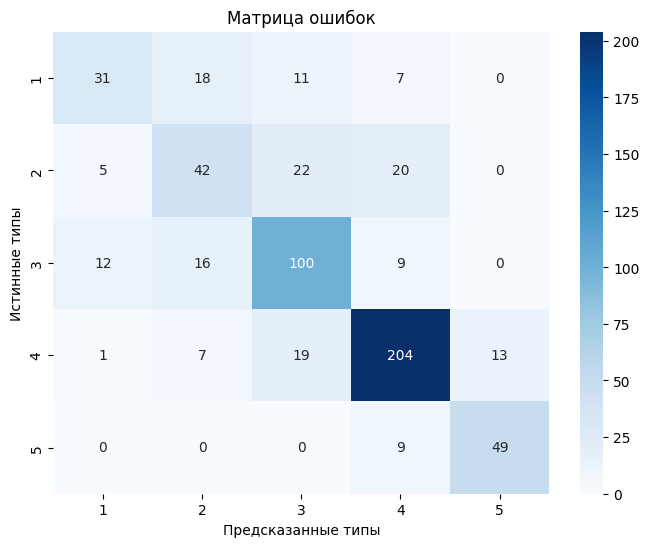

In [ ]:
# Словари с весами для типов 1 и 2
dictionary_1 = {
    "Е3": 3,
    "Е4": 3,
    "А1": 3,
    "А2": 3,
    "1А2": 3,
    "1А5": 1,
    "1К1": 2,
    "1В4": 3,
    "В7": 3,
    "1D6": 2,
    "2A5": 3,
    "3A2": 2,
    "3A8": 3,
    "3B2": 2,
    "5A3": 2,
    "6B5": 1
}

dictionary_2 = {
    "Е2": 1,
    "Е6": 1,
    "Б1": 2,
    "Б4": 1,
    "Ф4.6": 3,
    "С4": 3,
    "С5": 3,
    "С6": 1,
    "1В9": 3,
    "1D5": 1,
    "1D8": 1,
    "2A4": 1,
    "3B4": 1,
    "3B5": 2,
    "5B4": 1,
    "6B8": 1
}


def calculate_weighted_sum(row, dictionary):
    """
    Подсчитывает взвешенную сумму значений признаков из строки DataFrame на основе словаря.
    :param row: Строка DataFrame с числовыми признаками.
    :param dictionary: Словарь с ключами (названиями признаков) и их весами.
    :return: Взвешенная сумма.
    """
    weighted_sum = 0
    for feature, weight in dictionary.items():
        if feature in row:
            weighted_sum += row[feature] * weight
    return weighted_sum


def is_approaching(bounds, drive, thoroughness, opportunity, carelessness, avoidance, inaction):
    """Проверка, является ли случай типом приближения"""
    if type(bounds) is not list:
        bounds = [bounds] * 6
    if (carelessness < bounds[3]) & (avoidance < bounds[4]) & (inaction < bounds[5]):
        if int(drive >= bounds[0]) + int(opportunity >= bounds[2]) + int(thoroughness >= bounds[1]) > 0:
            return True
    return False


def is_avoiding(bounds, drive, thoroughness, opportunity, carelessness, avoidance, inaction):
    """Проверка, является ли случай типом ухода"""
    if type(bounds) is not list:
        bounds = [bounds] * 6
    if (drive < bounds[0]) & (opportunity < bounds[2]) & (thoroughness < bounds[1]):
        if int(carelessness >= bounds[3]) + int(avoidance >= bounds[4]) + int(inaction >= bounds[5]) > 0:
            return True
    return False


def is_ambivalent(bounds, drive, thoroughness, opportunity, carelessness, avoidance, inaction):
    """Проверка, является ли случай амбивалентным типом"""
    if type(bounds) is not list:
        bounds = [bounds] * 6
    if int(carelessness >= bounds[3]) + int(avoidance >= bounds[4]) + int(inaction >= bounds[5]) > 0:
        if int(drive >= bounds[0]) + int(opportunity >= bounds[2]) + int(thoroughness >= bounds[1]) > 0:
            return True
    return False


def classify_tors_type(row, bounds=None):
    """Классифицирует случай на основе профиля ТОРС согласно алгоритму."""
    if bounds is None:
        # Пороги по умолчанию согласно уточнению к правилу 1:
        # drive, thoroughness, opportunity, carelessness, avoidance, inaction
        bounds = [1.6, 1.6, 1.6, 2.0, 1.6, 1.4]
        #bounds = [1.5, 1.65, 1.5, 1.85, 1.5, 1.5]

    drive = row['drive']
    thoroughness = row['thoroughness']
    opportunity = row['opportunity']
    carelessness = row['carelessness']
    avoidance = row['avoidance']
    inaction = row['inaction']

    # Правило 1: Определение основной категории (приближение, амбивалентное, уход)
    approaching = is_approaching(bounds, drive, thoroughness, opportunity, carelessness, avoidance, inaction)
    avoiding = is_avoiding(bounds, drive, thoroughness, opportunity, carelessness, avoidance, inaction)
    ambivalent = is_ambivalent(bounds, drive, thoroughness, opportunity, carelessness, avoidance, inaction)

    # Правило 1: Амбивалентные случаи (тип 4)
    if ambivalent:
        return 4

    # Правило 2: Чистые случаи приближения (типы 1, 2, 3)
    elif approaching and not avoiding:
        # Вычисляем взвешенные суммы
        sum_dict_1 = calculate_weighted_sum(row, dictionary_1)
        sum_dict_2 = calculate_weighted_sum(row, dictionary_2)

        # Если взвешенная сумма словаря 1 больше, то тип 1, иначе тип 2
        if ('Ф6' not in row) or (row['Ф6'] == 0):
            max_approach_value = max(drive, thoroughness, opportunity)
            if max_approach_value == drive or max_approach_value == thoroughness:
                return 1 if sum_dict_1 >= sum_dict_2 else 2

        # Если условия не выполняются, возвращаем тип 3
        return 3

    # Правило 4: Чистые случаи ухода (тип 5)
    elif avoiding and not approaching:
        return 5

    # Все остальные случаи считаются неклассифицируемыми
    else:
        return None

import pandas as pd
# Загрузка данных
df = pd.read_excel('TORS_OLD.xlsx', sheet_name='Sheet1')

# Применение классификатора
df['predicted_type'] = df.apply(classify_tors_type, axis=1)

# Вывод распределения типов
print("Распределение классифицированных типов:")
print(df['predicted_type'].value_counts(dropna=False))

# Оценка качества классификации (если есть истинные значения)
if 'code' in df.columns:
    # Удаляем строки, где нет предсказания
    valid_idx = df['predicted_type'].notna()
    y_true = df.loc[valid_idx, 'code']
    y_pred = df.loc[valid_idx, 'predicted_type']

    # Преобразуем в int для метрик
    y_true = y_true.astype(int)
    y_pred = y_pred.astype(int)

    evaluate_classification(y_true, y_pred)
else:
    print("\nКолонка 'code' с истинными значениями не найдена. Оценка точности невозможна.")

drive - драйв	thoroughness - тщательность	obstacles - препятствия	opportunity - возможности 	threat - угрозы	avoidance - избегание	inaction - бездействие	carelessness - беспечность
1 драйвовый ― стремление к трудности, связанное с переживанием драйва. В профиле респондента по ТОРС наиболее высокие (или высокие) баллы имеет шкала драйв и выражены другие ориентации приближения к трудностям, при этом не выражены ориентации ухода. В качественных данных представлены индикаторы положительных оценок и эмоций, саморазвития, повышения энергии, высоких результатов. Содержательно чаще описываются интерес к путешествиям, смене устоявшейся ситуации, профессиональные трудности, «стартапы».
2 максимальный ― многозадачность и достижение перфекционистской цели при высокой трудоемкости усилий. Высоко выражена ориентация тщательность в сочетании с другими ориентациями приближения к трудным ситуациям и не выражены ориентации ухода. Наиболее значимыми признаками в качественных данных выступают высокие достижения, необходимость все успеть, многозадачность. Ставится цель выше, чем просто «достичь результатов» (завершить обучение обязательно с красным дипломом, быть лучшим или первым и т.п.).
3 оптимальный ― направленность на достижение трудной цели оптимальными усилиями (не выше, не ниже, чем требуют условия задачи). При этом зачастую важной составляющей является социальный ресурс. Выражены ориентации приближения к трудностям (с наиболее высоким показателем по ориентации на возможности) и не выражены ориентации ухода. В описаниях ТЖЗ часто встречается упоминание планомерного копинга и положительной переоценки ситуации, целей приближения. Характерна нейтральная оценка трудности. Зачастую содержание ситуаций связано с учебными, профессиональными трудностями и ситуациями болезней.
4 амбивалентный ― колебания между приближением к трудности и уходом от нее (выраженность одновременно одной, двух или трех ориентаций приближения в сочетании с одной, двумя или тремя ориентациями ухода). В качественных данных представлено частое упоминание отрицательных эмоциональных состояний, на преодоление которых нужно затратить силы и время; описываются цели как приближения к чему-то привлекательному, так и избавления от неприятного. Возможны колебания активности и пассивности при достижении трудной цели. Зачастую описываются межличностные, профессиональные и учебные трудности.
5 отстраненный ― уход от решения трудной жизненной задачи, избегание тяжелых переживаний, которыми поглощено сознание. Выражены одна, две или три шкалы ухода от трудностей и не выражены шкалы приближения. В качественных данных особенно часто встречаются интенсивные отрицательные эмоции (включая безысходность), копинг и цели избегания. Подобный тип отношения к ТЖЗ чаще всего встречается при описании ситуаций внутриличностных, межличностных трудностей (в том числе отношений с партнером) и ситуаций болезней.
В случаях, если профиль по опроснику и индикаторы указывали на разные типы, решение принималось по опроснику только при чрезмерно кратком описании (такие случаи в массиве составили не более 1,5 % от всех описаний). Остальные случаи, содержащие такое несовпадение, были распределены по классам на основе описаний ТЖЗ. Наблюдались и такие варианты сочетания, при которых и профиль опросника, и индикаторы в равной степени указывали на два типа, т.е. случай оказывался смешанным. При этом его относили к одному из двух классов.

Правило 1. Отнесение случая к типам: приближение, амбивалентное восприятие, уход
(123 – 4 – 5)	На основе анализа профиля ТОРС
	– если в профиле ТОРС является выраженной хотя бы одна из ориентаций приближения и не выражена ни одна из ориентаций ухода, то случай относится к типам приближения (1, 2, 3);
– если является выраженной хотя бы одна из ориентаций ухода и не выражена ни одна из ориентаций приближения, то случай относится к 5 типу;
– если являются выраженными хотя бы одна из ориентаций ухода и хотя бы одна из ориентаций приближения, то случай относится к 4 типу;
– случаи, содержащие профиль, в котором не выражена ни одна ориентация, в данной работе считаются неклассифицируемыми


Уточнение к правилу 1. Проверка порогов шкал ТОРС
(123 – 4 – 5)
	Перебор всех возможных наборов пороговых границ шкал ТОРС в диапазоне от 1.0 до 2.1 с шагом 0.05
	– если считать тщательность выраженной при соответствующем ей числе больше 1.65,
а беспечность считать выраженной при соответствующем ей числе больше 1.85,
при сохранении порогов остальных шкал равными 1.5 точность повышается; поэтому далее первое правило используется с уточнением

Правило 2. Отделение драйвового и максимального типов от оптимального типа
(12 – 3)
На основе анализа профиля ТОРС и наличия в разметке категории Ф6
– если в описании ТЖЗ не встречаются индикаторы категории Ф6 (Ф6 = 0), а в соответствующем профиле среди шкал приближения максимальное значение достигается по шкалам драйв или/и тщательность, то относим случай к первым двум типам (1, 2);
– иначе относим случай к 3 типу

Правило 3. Разделение драйвового и максимального типов
(1 – 2)	На основе анализа разметки созданы словарь 1 и словарь 2, включающие по 16 подкатегорий, упоминание которых характеризует 1 и 2 типы; каждой подкатегории присвоена степень значимости в баллах от 1 до 3
	В каждом индивидуальном случае подсчитываем взвешенные суммы частот подкатегорий, относящихся к словарю 1 и отдельно к словарю 2:
– если взвешенная сумма подкатегорий словаря 1 оказалась больше взвешенной суммы подкатегорий словаря 2, то относим случай к 1;
– иначе относим случай ко 2 типу
